In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.preprocessing import scale

In [2]:
df=pd.read_csv('Boston.csv',header=0)
df=df.values

In [3]:
x_data=df[:,:12]
y_data=df[:,12]
x_train=tf.cast(scale(x_data[:300]),dtype=tf.float32)
y_train=y_data[:300]
x_vaild=tf.cast(scale(x_data[300:400]),dtype=tf.float32)
y_vaild=y_data[300:400]
x_test=tf.cast(scale(x_data[400:len(x_data)]),dtype=tf.float32)
y_test=y_data[400:len(y_data)]

w=tf.Variable(tf.random.normal([12,1],mean=0.0,stddev=1.0,dtype=tf.float32))
b=tf.Variable(tf.zeros(1),dtype=tf.float32)

2023-03-09 19:16:07.440345: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
def model(x,w,b):
    return tf.matmul(x,w)+b
def loss_function(x,y,w,b):
    err=model(x,w,b)-y
    return tf.reduce_mean(tf.square(err))
def grad(x,y,w,b):
    with tf.GradientTape() as tape:
        return tape.gradient(loss_function(x,y,w,b),[w,b])

In [5]:
learning_rate=0.01
optimizer=tf.keras.optimizers.SGD(learning_rate)

loss_list_train=[]
loss_list_vaild=[]

training_epochs=5
batch_size=10
total_step=int(300/batch_size)
for epoch in range(training_epochs):
    for step in range(total_step):
        xs=x_train[step*batch_size:(step+1)*batch_size,:]
        ys=y_train[step*batch_size:(step+1)*batch_size]
        grads=grad(xs,ys,w,b)
        optimizer.apply_gradients(zip(grads,[w,b]))

    loss_list_train.append(loss_function(x_train,y_train,w,b).numpy())
    loss_list_vaild.append(loss_function(x_vaild,y_vaild,w,b).numpy())
    print('epoch:{:03d}, train loss={:.4f}, vaild loss=:{:.4f}'.format(epoch+1,loss_function(x_train,y_train,w,b),loss_function(x_vaild,y_vaild,w,b)))

epoch:001, train loss=299.2749, vaild loss=:211.5491
epoch:002, train loss=160.5827, vaild loss=:128.6911
epoch:003, train loss=120.3403, vaild loss=:118.0990
epoch:004, train loss=108.4551, vaild loss=:122.2544
epoch:005, train loss=104.8349, vaild loss=:127.3627


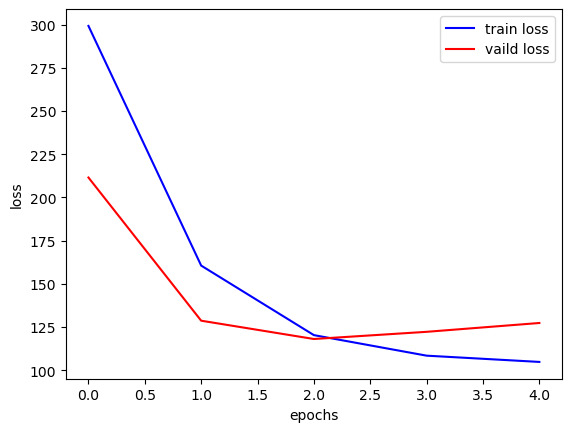

In [6]:
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(loss_list_train,'blue',label='train loss')
plt.plot(loss_list_vaild,'red',label='vaild loss')
plt.legend(loc=1)